In [1]:
## Import dependencies
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
import scripts.theodolite_utils as theodo_u
import scripts.theodolite_plot_function as theodo_p
import scripts.groundtruth_utils as theodo_g
import random
import pandas as pd
from numpy import linalg
import importlib
theodo_u = importlib.reload(theodo_u)
theodo_p = importlib.reload(theodo_p)

In [2]:
## Import files
theodo_u = importlib.reload(theodo_u)

file_0 = "/home/maxime/model_MC_0_0_0_0_0.csv"
file_1 = "/home/maxime/model_MC_1_0_0_0_0.csv"
file_2 = "/home/maxime/model_MC_0_1_0_0_0.csv"
file_3 = "/home/maxime/model_MC_0_0_1_0_0.csv"
file_4 = "/home/maxime/model_MC_0_0_0_1_0.csv"
file_5 = "/home/maxime/model_MC_1_1_1_1_0.csv"

Data_0 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_0)
Data_1 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_1)
Data_2 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_2)
Data_3 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_3)
Data_4 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_4)
Data_5 = theodo_u.read_point_uncertainty_with_raw_data_csv_file_pandas(file_5)


In [3]:
## Creating Data Frames
theodo_u = importlib.reload(theodo_u)

Data_total = [Data_0,Data_1,Data_2,Data_3,Data_4,Data_5]

df_0 = pd.DataFrame(data=Data_0,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])
df_1 = pd.DataFrame(data=Data_1,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])
df_2 = pd.DataFrame(data=Data_2,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])
df_3 = pd.DataFrame(data=Data_3,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])
df_4 = pd.DataFrame(data=Data_4,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])
df_5 = pd.DataFrame(data=Data_5,columns=['Time_stamp','X','Y','Z','C1','C2','C3','C4','C5','C6','C7','C8','C9','distance','azimuth','elevation'])

In [4]:
## Frobenius norm for all data according to the model chosen and the range linked
def add_Frobenius(df):
    Distance_F = []
    for i,item in df.iterrows() :
        C = np.array(#Compute covariance matrix   
                [
                    [float(item['C1']), float(item['C2']), float(item['C3'])],
                    [float(item['C4']), float(item['C5']), float(item['C4'])],
                    [float(item['C7']), float(item['C8']), float(item['C9'])],
                ])
        Distance_F.append(np.sqrt(1000000*(theodo_u.Frobenius_norm(C, np.zeros((3,3))))))

    df['Frobenius_norm'] = Distance_F
    return df


In [5]:
## Adding Frobenius norm to Data Frames
df_0=add_Frobenius(df_0)
df_1=add_Frobenius(df_1)
df_2=add_Frobenius(df_2)
df_3=add_Frobenius(df_3)
df_4=add_Frobenius(df_4)
df_5=add_Frobenius(df_5)

In [6]:
def add_stddev(df):
    std_dev = []
    for i,item in df.iterrows() :
        std_dev.append(np.sqrt(item['Frobenius_norm']))

    df['std_dev'] = std_dev
    return df

In [7]:
df_0=add_stddev(df_0)
df_1=add_stddev(df_1)
df_2=add_stddev(df_2)
df_3=add_stddev(df_3)
df_4=add_stddev(df_4)
df_5=add_stddev(df_5)

In [8]:
## Sort distances
def sort_distance(df):
    # df.loc[df['distance'].between(0,25,'left'),'0 to 25 m'] = '0 to 25 m'
    # df.loc[df['distance'].between(25,75,'left'),'dist'] = '25 to 75 m'
    # df.loc[df['distance'].between(75,125,'left'),'dist'] = '75 to 125 m'
    # df.loc[df['distance'].between(125,200,'left'),'dist'] = '125 to 200 m'
    # df.loc[df['distance'].between(200,500,'left'),'dist'] = 'more than 200 m'
    df.loc[df['distance'].between(0,75,'left'),'0 to 75 m'] = df['Frobenius_norm']
    df.loc[df['distance'].between(75,150,'left'),'75 to 150 m'] = df['Frobenius_norm']
    df.loc[df['distance'].between(150,1000,'left'),'more than 150 m'] = df['Frobenius_norm']
#     df.loc[df['distance'].between(125,200,'left'),'125 to 200 m'] = df['Frobenius_norm']
#     df.loc[df['distance'].between(200,500,'left'),'more than 200 m'] = df['Frobenius_norm']
    return df

In [9]:
## Sort distances to Data Frames
df_0=sort_distance(df_0)
df_1=sort_distance(df_1)
df_2=sort_distance(df_2)
df_3=sort_distance(df_3)
df_4=sort_distance(df_4)
df_5=sort_distance(df_5)

In [10]:
def pandas_to_list(df):
    df_0_to_25 = []
    df_25_to_75 = []
    df_75_to_125 = []
    df_125_to_200 = []
    df_more_200 = []

    df_0_to_75 = df['0 to 75 m'].tolist()
    df_75_to_150 = df['75 to 150 m'].tolist()
#     df_75_to_125 = df['75 to 125 m'].tolist()
#     df_125_to_200 = df['125 to 200 m'].tolist()
    df_more_150 = df['more than 150 m'].tolist()
    df_frobenius_norm = df['Frobenius_norm'].tolist()

    D_1 = []
    for i in df_0_to_75:
        if np.isnan(i)!=True:
            D_1.append(float(i))
    D_2 = []
    for i in df_75_to_150:
        if np.isnan(i)!=True:
            D_2.append(float(i))
    D_3 = []
    for i in df_more_150:
        if np.isnan(i)!=True:
            D_3.append(float(i))
#     D_4 = []
#     for i in df_125_to_200:
#         if np.isnan(i)!=True:
#             D_4.append(float(i))
#     D_5 = []
#     for i in df_more_200:
#         if np.isnan(i)!=True:
#             D_5.append(float(i))
    return D_1,D_2,D_3,df_frobenius_norm,0 # ,D_4,D_5

In [11]:
df_0_D_1, df_0_D_2, df_0_D_3, df_0_D_4, df_0_D_5 = pandas_to_list(df_0)
df_1_D_1, df_1_D_2, df_1_D_3, df_1_D_4, df_1_D_5 = pandas_to_list(df_1)
df_2_D_1, df_2_D_2, df_2_D_3, df_2_D_4, df_2_D_5 = pandas_to_list(df_2)
df_3_D_1, df_3_D_2, df_3_D_3, df_3_D_4, df_3_D_5 = pandas_to_list(df_3)
df_4_D_1, df_4_D_2, df_4_D_3, df_4_D_4, df_4_D_5 = pandas_to_list(df_4)
df_5_D_1, df_5_D_2, df_5_D_3, df_5_D_4, df_5_D_5 = pandas_to_list(df_5)

In [12]:
print(np.mean(df_1_D_1),np.mean(df_1_D_2),np.mean(df_1_D_3),np.mean(df_1_D_4))

0.040254031540776614 0.12157621832193372 0.2634666350070438 0.06453079134689152


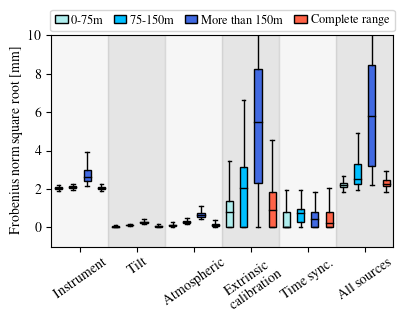

In [20]:
data = [df_0_D_1, df_0_D_2, df_0_D_3, df_0_D_4,
        df_1_D_1, df_1_D_2, df_1_D_3, df_1_D_4,
        df_2_D_1, df_2_D_2, df_2_D_3, df_2_D_4,
        df_3_D_1, df_3_D_2, df_3_D_3, df_3_D_4,
        df_4_D_1, df_4_D_2, df_4_D_3, df_4_D_4,
        df_5_D_1, df_5_D_2, df_5_D_3, df_5_D_4]

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)
font_size = 10

width = 3.487
height = width/1.618

fig, ax = plt.subplots()
box = ax.boxplot(data, showfliers=False, notch=False, patch_artist=True)

plt.xticks(ticks=[2.5, 6.5, 10.5, 14.5, 18.5, 22.5], labels=['Instrument', 'Tilt', 'Atmospheric', '\\ Extrinsic\ncalibration', 'Time sync.', 'All sources'], fontsize=font_size, ha='center', ma='center', rotation=35)

colors = ['paleturquoise', 'deepskyblue', 'royalblue', 'tomato',#, 'pink',
          'paleturquoise', 'deepskyblue', 'royalblue', 'tomato',#, 'pink',
          'paleturquoise', 'deepskyblue', 'royalblue', 'tomato',#, 'pink',
          'paleturquoise', 'deepskyblue', 'royalblue', 'tomato',#, 'pink',
          'paleturquoise', 'deepskyblue', 'royalblue', 'tomato',#, 'pink',
          'paleturquoise', 'deepskyblue', 'royalblue', 'tomato']#, 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set_color('black')
    
# plt.axvline(x=4.5, linestyle='dashed', color="dimgray")
# plt.axvline(x=8.5, linestyle='dashed', color="dimgray")
# plt.axvline(x=12.5, linestyle='dashed', color="dimgray")
# plt.axvline(x=16.5, linestyle='dashed', color="dimgray")
# plt.axvline(x=20.5, linestyle='dashed', color="dimgray")

ax.axvspan(0.5, 4.5, alpha = 0.2, color='lightgrey')
ax.axvspan(4.5, 8.5, alpha = 0.3, color='darkgrey')
ax.axvspan(8.5, 12.5, alpha = 0.2, color='lightgrey')
ax.axvspan(12.5, 16.5, alpha = 0.3, color='darkgrey')
ax.axvspan(16.5, 20.5, alpha = 0.2, color='lightgrey')
ax.axvspan(20.5, 24.5, alpha = 0.3, color='darkgrey')
ax.set_ylabel("Frobenius norm square root [mm]", fontsize=font_size)
#ax.set_yscale('log')
#ax.set_yticklabels([])
ax.set_ylim(bottom=-1, top=10)
ax.legend(handles=[box["boxes"][0], box["boxes"][1], box["boxes"][2], box["boxes"][3]], #, box["boxes"][4]],
          handletextpad=0.3,
          handlelength=1.0,
          columnspacing=0.8,
          labels =['0-75m', '75-150m', 'More than 150m', 'Complete range'], #, '125 to 200m', 'More than 200m'],
          loc='lower center', bbox_to_anchor=(0.5, 0.99), ncol=4, fontsize=font_size-1)
plt.tight_layout()
fig.subplots_adjust(left=.01, bottom=.01, right=.99, top=.99)
fig.set_size_inches(width, height)
plt.savefig("../figs/uncertainty/fig1_will_multiple_boxplot.pdf", bbox_inches="tight")
plt.show()